
# Digital Signal Processing

## Solutions: Exercise 1

### Part 1: Discrete Signals and Systems

#### Task 1: Function generator
In this exercise a function generator shall be programmed which generates a discrete sinusoidal signal of frequency $f$ at a sampling frequency of $f_s$. For a time continuous system it is common to use the angular frequency $\omega = 2 \pi f$. Thus a time continuous sine signal is given by  

$$ x(t) = \text{sin}\,(\omega \cdot t) \,.$$

Within a time discrete system the sinusoidal signal is sampled with periods of the length $ T_s = 1/f_s$, such that the time instances $t = T_s \cdot k$ can be expressed by the indices $k = 0,1,2,\ldots.$ Therefore we obtain the time discrete signal

$$ x(k) = x(t)|_{t=kT_s} = \text{sin}\,(\omega \cdot T_s \cdot k) \,.$$

For time discrete systems it makes sense to introduce the normalized angular frequency $\Omega$, which is unit- and dimensionless.

\begin{align*}
    \Omega &:= \omega \cdot T_s\\
              &= 2\pi f \cdot T_s\\
              &= 2\pi \frac{f}{f_s}
\end{align*}

This definition will be used throughout the further exercises, since it allows to design and elaborate digital systems independent on the sampling frequency. Thus

$$ x(k) = \text{sin}\,(\Omega \cdot k) \,.$$



**a)** Create an array `x_a` with 60 samples of a sinusoidal signal with the frequency $f_a = 400\, \text{Hz}$ at a sampling frequency of $f_s = 8\, \text{kHz}$.

In order to do so initialize an array $\text{k} = [0,1,\ldots,59]$ which represents the time index of the sampled signal $x_a(k)$. Make use of numpy's `sin()`-function.

Display the signal with the help of the function `stem()` from the library matplotlib. What is the period of the sampled signal?


**b)** Change the frequency of the sampled sinusoidal signal to $f_b = 960\,\text{Hz}$ and display the resulting discrete array `x_b` again by using `stem()`.

What is the period of the sampled signal now?

**Python Hints:**  
```python
k = np.arange(0,60,1)                                 # creating index vector,
Omega_a = 2*np.pi* 400/8000                           # defining Omega,
x_a = np.sin(Omega0*k)                                # elementwise calculation of the signal,
plt.figure(1)                                         # create figure to plot in
plt.stem(k,x_a, use_line_collection=True)             # plotting xsin over its index vector k,
plt.show()                                            # show the plot
```

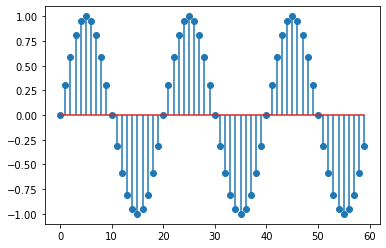

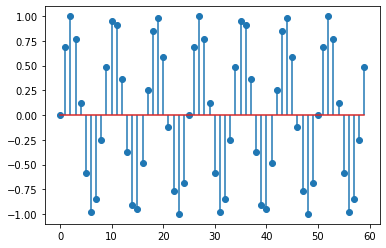

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Your code goes here!
# Variable names for Solution tester:
# a) Omega_a, k, x_a
# b) Omega_b, k, x_b

f_s = 8000

f_a = 400
f_b = 960

Omega_a = 2*np.pi*f_a/f_s
Omega_b = 2*np.pi*f_b/f_s

k = np.arange(0,60,1)

x_a = np.sin(Omega_a*k)
x_b = np.sin(Omega_b*k)
plt.figure(1)
plt.stem(k,x_a,use_line_collection=True)
plt.figure(2)
plt.stem(k,x_b,use_line_collection=True)
plt.show()


In [2]:
# Solution tester
# This cell will check if your variables and vectors are correct.
import solution_tester
solution_tester.exercise1(k, x_a, x_b, Omega_a, Omega_b)

Index vector correct
Correct length for Omega_a.
Correct length for x_a.
Correct length for Omega_b.
Correct length for x_b.


#### Task 2: special series
This exercise demonstrates a fundamental series for digital signal processing.  

Generate a delayed impulse series with amplitude $1.2$:

\begin{equation*}
x(k) = 1.2 \cdot \delta(k-4), \;\;\;\;\; -5 \leq k \leq 10
\end{equation*}

with 

\begin{equation*}
\delta(k) := \left\{
    \begin{array}{l l}	
         1, & k=0\\
         0, & k \neq 0
    \end{array}\right.
\end{equation*}
denoting the dirac series and plot this series using the function `stem()`.

**Python Hints:**  
```python
k = np.arange(-5,11,1)                                # creating index vector k,
x = np.zeros(16)                                      # creating a vector with 16 entries,
x[4+5] = 1                                            # placing a dirac impulse dirac(k-4),
x = x * 1.2                                           # scaling the vector x,
plt.stem(k,x, use_line_collection=True)               # plotting vector x over the indices k,
plt.show()                                            # show the plot
```

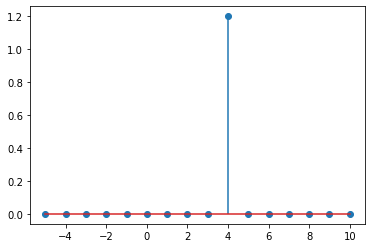

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Your code goes here!
# Variable names for Solution tester:
# k, x

k = np.arange(-5,11,1)
x = np.zeros(16)
x[4+5] = 1
x = x*1.2
plt.stem(k,x, use_line_collection=True)
plt.show()

In [4]:
# Solution tester
# This cell will check if your variables and vectors are correct.
import solution_tester
solution_tester.exercise2(k, x)

Index vector correct
Correct length for x.


### Part 2: DFT

#### Task 1: properties of the DFT
Start with the same series `x_a` as in Task 1 of first part. You will have to generate it here again.
    
**a)** Calculate the DFT $X_a(n)$ using the function `np.fft.fft(x_a)`. Plot the real $\text{Re}\{X_a(n)\}$ and imaginary $\text{Im}\{X_a(n)\}$ part of $X_a(n)$.

**b)** Produce a cyclic shift of $x_a(k)$ by $\lambda = 4$ resp. 8 cycles: $x_b(k) = (x_a(k+\lambda))_M$. What is the relation between $X_b(n) = \text{DFT}\{x_b(k)\}$ and $X_a(n)$?

**c)** Calculate the discrete fourier transform $X_c(n)$ of $x_c(k) = x_a(k) \cdot \text{exp}(j2\pi\frac{k}{16})$. What is the relation between $X_c(n)$ and $X_a(n)$?

**Python Hints:**  
```python
X = np.fft.fft(x)                                     # calculate fft/dft of x
x.real                                                # returns real part of x
x.imag                                                # returns imaginary part of x
np.abs(x)                                             # returns absolute value of x
np.roll(x,s)                                          # perform circular shift by s cycles on x 
x_c = x_a*np.exp(2*1j*np.pi/16*k)                     # create modulated version of x_a acc to c)
plt.figure(1)                                         # create figure to plot in
plt.stem(k,x.real, use_line_collection=True)          # stem plot of real part of x
plt.stem(k,x.imag,'r','ro', use_line_collection=True) # second stem of imag part plot in same figure, color: red
plt.figure(2)                                         # create second figure ...
```

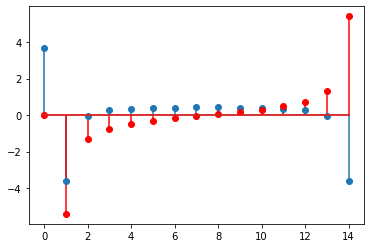

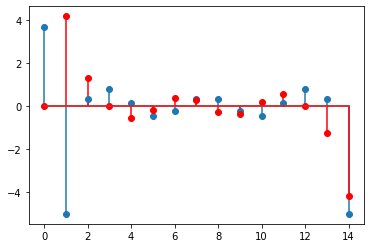

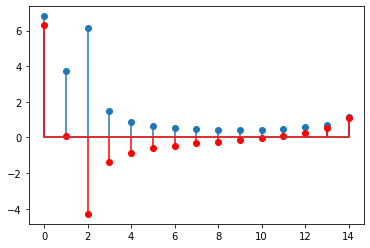

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Your code goes here!


f_s = 8000

f_a = 400

Omega_a = 2*np.pi*f_a/f_s

k = np.arange(0,15,1)
x_a = np.sin(Omega_a*k)#k+1j*(7-k)

x_b = np.roll(x_a,4)
#a)
plt.figure(1)
plt.stem(k,np.fft.fft(x_a).real,use_line_collection=True)
plt.stem(k,np.fft.fft(x_a).imag,'r','ro',use_line_collection=True)
#b)
plt.figure(2)
plt.stem(k,np.fft.fft(x_b).real,use_line_collection=True)
plt.stem(k,np.fft.fft(x_b).imag,'r','ro',use_line_collection=True)
#c)
x_c = x_a*np.exp(2*1j*np.pi/16*k)
plt.figure(3)
plt.stem(k,np.absolute(np.fft.fft(x_c)),use_line_collection=True)
plt.stem(k,np.fft.fft(x_c).imag,'r','ro',use_line_collection=True)

plt.show()

#### Task 2: interpolation by zero padding
Calculate the DFT of $x(k) = 1-\text{cos}(2\pi k \frac{8}{64})$ for $k=0\ldots63$. Do common characteristics exist with the discrete fourier transform of the signal

\begin{equation*}
x_0(k) = \left\{
    \begin{array}{l l}	
         x(k),&  k=0\ldots63\\
         0,  & k=64\ldots127
    \end{array}\right. \;?
\end{equation*}

**Python Hints:**  
```python

k = np.arange(0,64,1)
x = 1 - np.cos(2*np.pi*k*8/64)                         # defines x(k),
x0 = np.append(x,np.zeros(64))                         # zero pad x with 64 zeros
```

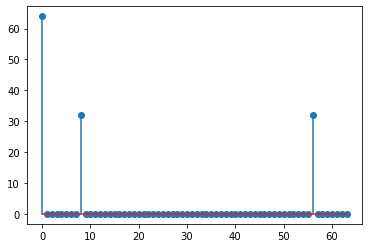

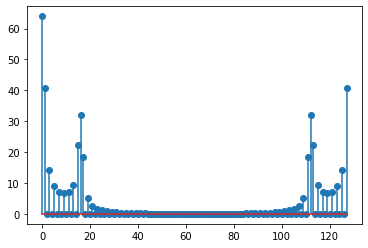

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Your code goes here!


k = np.arange(0,64,1)
kk = np.arange(0,128,1)
x = 1 - np.cos(16*np.pi*k/64)
x0 = np.append(x,np.zeros(64))

plt.figure(1)
plt.stem(k,np.abs(np.fft.fft(x)),use_line_collection=True)
plt.figure(2)
plt.stem(kk,np.abs(np.fft.fft(x0)),use_line_collection=True)

plt.show()